In this notebook we are using **Neural Network for Applied Sciences and Engineering** as the basis.

All algorithms are based on that book. In this paper we are going through Chapter 2 **Fundamentals of Neural
Networks and Models for Linear Data Analysis**

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from matplotlib.colors import ListedColormap
%matplotlib inline
import numpy as np

### Create Test Data
Here we use sklearn libraries to create toy data

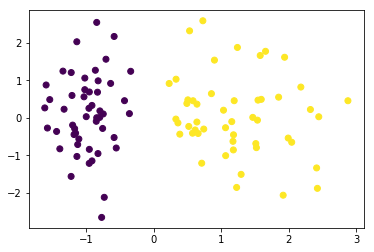

In [13]:
plt.figure()
X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1)

### Perceptron Algorithm:
1. *Initialeze Weights*
    > Since this toy example only has 2 variables set initial weight $W^0$ as random matrix in the range [-1,1]
2. *Calculate u*
3. *Set y*
4. *Calculate the error for each case on the target $t$ *
5. *Calculate new weight $W^i$
6. *Repeat for number of epochs*
    > $u = W^T.X$
    
    > $y =\begin{cases}
    0, & \text{if $u<0$}.\\
    1, & \text{otherwise}.
  \end{cases}$
  
   > $E = t-y$
   
   > $W^i = W^{i-1} + \beta.X.E$

In [4]:
def Error_funct(T,Y):
    return T-Y

In [5]:
def compute_y(X,W):
    u = np.dot(W, X.T)
    if (u < 0):
        return 0
    else:
        return 1

In [6]:
def update_w(W, X, beta, E):
    return W + (beta*E)*X

In [7]:
def initialize_w(features):
    return np.asmatrix(np.random.uniform(-0.01,0.01,features))

In [14]:
B = 0.01
weight = initialize_w(len(X1[0]))
print(weight)
N = 100 #Number of epochs
for n in range(N):
    for i in range(len(X1)):
        target = Y1[i]
        y = compute_y(np.asmatrix(X1[i]), weight)
        error = Error_funct(target,y)
        weight = update_w(weight, X1[i], B, error)

[[ 0.00466913  0.00431131]]


In [15]:
weight

matrix([[ 0.03053093, -0.00416501]])

In [16]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 0.5, X1[:, 0].max() + 0.5
y_min, y_max = X1[:, 1].min() - 0.5, X1[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = []
for i in range(len(grid)):
    Z.append(compute_y(np.asmatrix(grid[i]), weight))
Z1 = np.asarray(Z)

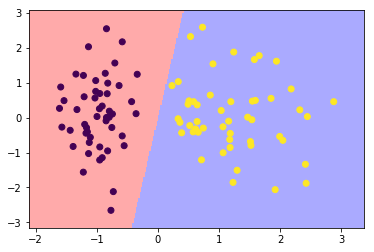

In [17]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
Z1 = Z1.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z1, cmap=cmap_light)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1)
plt.show()

## Multi-Output Perceptron for Multicategory Classification
First we use sklearn to produce a toy data set

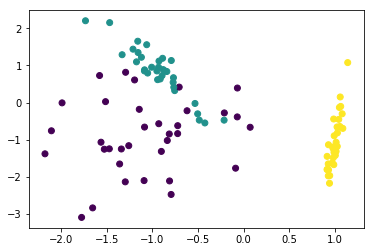

In [18]:
plt.figure()

X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1, n_classes = 3)

#X1, Y1 = make_blobs(n_features=2, centers=3)

plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1)

Weight initialization

In [19]:
def multi_initialize_w(features):
    weight_matrix = np.zeros((features+1, features+1))
    for i in range(features+1):
        for j in range(features+1):
            weight_matrix[i,j] = np.random.uniform(-0.01,0.01,1)
    return weight_matrix

Get predictions based on weights and in input $X$. Here we a blob say it is in 2 different classes

In [20]:
def multi_compute_y(X,weights):
    u = np.dot(weights, X.T)
    for i in range(len(u)):
        if u[i] < 0:
            u[i] = 0
        else:
            u[i] = 1
    return u

Get error vector

In [21]:
def multi_error(t,y):
    return t-y

Update the weights. Only the weights that are wrong should be updated so we have $E.X$ since $E$ is a 3x1 matrix and $X$ is 1x3 matrix

In [22]:
def multi_update_weights(beta, weights, X, E):
    return (weights + beta*(np.dot(E,X)))

Because the toy data set gives categorzation in the form of an integer we have to convert this into a vector for the perceptron algotrithm. The perceptron algorithm churns out vectors. Example [0,0,1] from the percetron means category 2 for the toy example 

In [23]:
def convert_target(Y):
    n = Y.max()
    T = np.zeros((len(Y), n+1))
    for i in range(len(Y)):
        T[i, Y[i]] = 1
    return T    

We can't use multi_compute_y because this allows the data to be in more than one category. The perceptron algorithm finds the index of the maximum value. Since the index corresponds to the generated examples Y1 we just return the index with the highest value.

In [24]:
def predict(X, weights):
    u = np.dot(weights, X.T)
    ind = np.argmax(u)
    return ind

In [25]:
Y1_conv = convert_target(Y1)

In [26]:
type(Y1_conv[0])

numpy.ndarray

In [27]:
B = 0.01
weight = multi_initialize_w(len(X1[0]))
print(weight)
N = 1000 #Number of epochs
for n in range(N):
    for i in range(len(X1)):
        target = Y1[i]
        X_adj = np.asmatrix(np.append([1], X1[i]))
        y = multi_compute_y(X_adj, weight)
        error = multi_error(np.asmatrix(Y1_conv[i]).T, y)
        weight = multi_update_weights(B, weight, X_adj, error)
weight

[[ 0.00194512 -0.00728653 -0.0017424 ]
 [-0.00094905  0.0072147  -0.00101779]
 [ 0.00948359  0.00347998 -0.00877819]]


matrix([[-0.03805488, -0.04487998, -0.0256086 ],
        [ 0.00905095, -0.02006682,  0.01595994],
        [-0.01051641,  0.03978011,  0.00467883]])

In [28]:
h = 0.1
x_min, x_max = X1[:, 0].min() - 0.5, X1[:, 0].max() + 0.5
y_min, y_max = X1[:, 1].min() - 0.5, X1[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = []
for i in range(len(grid)):
    #Z.append(multi_compute_y(np.asmatrix(np.append([1],grid[i])), weight))
    Z.append(predict(np.asmatrix(np.append([1],grid[i])), weight))
Z1 = np.asarray(Z)

In [29]:
Z1[-1]

2

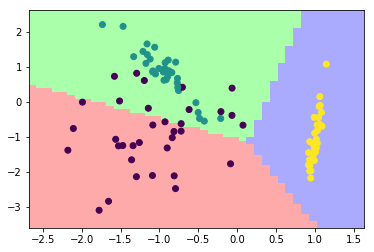

In [30]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
Z1 = Z1.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z1, cmap=cmap_light)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1)
plt.show()

## Linear Neuron as a Classifier

This code does not work very well. The Linear Neuron classifier with a single neuron works best when we have a linear relationship. However, this code is useful as it forms the basis for the multiple neuron code in the next section. The results here are therefor not very useful as you'll see.

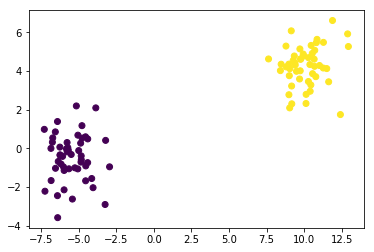

In [31]:
plt.figure()

'''
X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1, n_classes = 2)
'''



X1, Y1 = make_blobs(n_features=2, centers=2)

plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1)

In [32]:
def neuron_error(T,Y):
    
    return np.asmatrix(T).T-Y

In [33]:
def neuron_u(W,X):
    return np.dot(W, X.T)

In [34]:
def neuron_u(W,X):
    return np.dot(X,W.T)

In [35]:
def neuron_update_w(W, X, E, beta):
    delta_w = beta*E*X
    return W + delta_w

In [36]:
def neuron_update_w(W, X, E, beta):
    dw = np.mean((X.T * np.asarray(E).T).T, axis=0)
    return W + beta*np.asmatrix(dw)

In [37]:
def initialize_w(features):
    return np.asmatrix(np.random.uniform(-0.01,0.01,features))

In [38]:
def neuron_predict(X,W):
    u = np.dot(W, X.T)
    if (u < 0):
        return 0
    else:
        return 1

In [39]:
B = 0.001
weight = initialize_w(len(X1[0]) + 1)
X_t = np.ones((len(X1), len(X1[0]) + 1))
X_t[:,1:] = X1
print(weight)
N = 100
for n in range(N):
    target = Y1
    y = neuron_u(weight,np.asmatrix(X_t))
    error = neuron_error(target,y)
    weight = neuron_update_w(weight, X_t, error,B)

[[ 0.00845567 -0.00371275 -0.00320329]]


In [40]:
weight

matrix([[ 0.03742789,  0.05900457,  0.04746137]])

In [41]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 0.5, X1[:, 0].max() + 0.5
y_min, y_max = X1[:, 1].min() - 0.5, X1[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]
grid_t = np.ones((len(grid), len(grid[0]) + 1))
grid_t[:,1:] = grid
Z = []
for i in range(len(grid_t)):
    Z.append(neuron_predict(np.asmatrix(grid_t[i]), weight))
Z1 = np.asarray(Z)

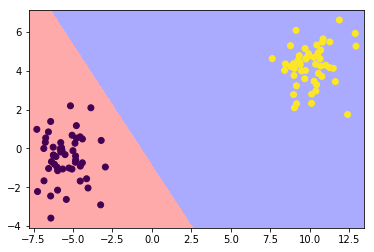

In [42]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
Z1 = Z1.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z1, cmap=cmap_light)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1)
plt.show()

## Multiple Linear Neuron Models
In the above section we had a single neuron, see page 51. In this section we will vectorize this code allowing for multiple neurons, see page 64

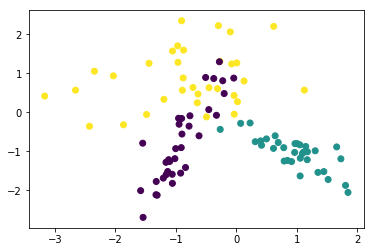

In [43]:
plt.figure()


X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1, n_classes = 3)




#X1, Y1 = make_blobs(n_features=2, centers=3)

plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1)

In [44]:
def neuron_error(T,Y):
    
    return T-Y

In [45]:
def neuron_u(W,X):
    return np.dot(X,W.T)

If we use *example-by-example* learning this will take a long time. Instead we will use *echelon* learning and use numpy's matrix multiplication to run the code. Then our only loop is the for loop. Our weight change function is the average of Error across all examples see page 50.

$\Delta w = \beta\dfrac{1}{n}\sum_{i=1}^{n}E_{i}x_{i}$

In [46]:
def neuron_update_w(W, X, E, beta):
    delta_w = (beta/len(X))*np.dot(E.T,X)
    return W + delta_w

In [47]:
def neuron_initialize_w(feature_size, output_size):
    weight_matrix = np.zeros((output_size, feature_size))
    for i in range(output_size):
        for j in range(feature_size):
            weight_matrix[i,j] = np.random.uniform(-0.01,0.01,1)
    return weight_matrix

In [48]:
def convert_target(Y):
    n = Y.max()
    T = np.zeros((len(Y), n+1))
    for i in range(len(Y)):
        T[i, Y[i]] = 1
    return T   

Because we vectorize the targe(Y1) in the form [0,1,0] = 1 or [1,0,0] = 0 or [0,0,1] = 2. The predict will find the index with the maximum value (argmax) and that will correspond to the Y1 targets.

In [49]:
def neuron_predict(X, weights):
    ret_y = np.zeros(len(X))
    u = np.dot(X,W.T)
    for i in range (len(u)):
        ret_y[i] = np.argmax(u[i])
    return ret_y

In [50]:
B = 0.01
Y = convert_target(Y1)
X_t = np.ones((len(X1), len(X1[0]) + 1))
X_t[:,1:] = X1
W = neuron_initialize_w(len(X_t[0]),len(Y[0]))
print(W)
N = 1000
for i in range(N):
    U = neuron_u(W, X_t)
    E = neuron_error(Y,U)
    W = neuron_update_w(W, X_t, E, B)
print(W)

[[ 0.00703502  0.00644511 -0.00868391]
 [ 0.00590809  0.00615792 -0.00454347]
 [-0.0032365   0.00287007 -0.00439703]]
[[ 0.22415091 -0.22848257 -0.17118983]
 [ 0.37736257  0.31952993 -0.11377448]
 [ 0.39753614 -0.09166121  0.28439668]]


In [52]:
Y.shape, W.shape, X_t.shape, U.shape, E.shape

((100, 3), (3, 3), (100, 3), (100, 3), (100, 3))

In [54]:
h = 0.1
x_min, x_max = X1[:, 0].min() - 0.5, X1[:, 0].max() + 0.5
y_min, y_max = X1[:, 1].min() - 0.5, X1[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]
grid_t = np.ones((len(grid), len(grid[0]) + 1))
grid_t[:,1:] = grid
Z = neuron_predict(grid_t, W)

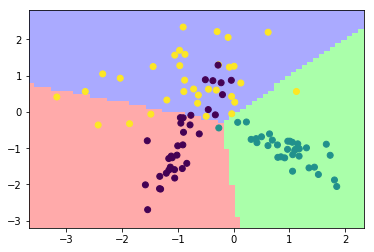

In [55]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1)
plt.show()